# 目標:

學習 BASEMAP的進階應用

# 重點: 

1. 導入PANDAS, 利用PANDAS 的數據繪製關係圖

2. 如何自行輸入經緯度繪製所在區域的地圖

3. 學習如何讀取氣象資訊檔: netCDF4

有疑問, 請多提出來, 有專家陪跑

In [1]:
#載入氣象資訊檔, 提供解讀檔案資訊
!pip install netCDF4

In [30]:
# 導入數據集
import os
import pandas as pd
import numpy as np
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

posi = pd.read_csv(os.path.join('example DATASET/', '2014_us_cities.csv')) # 讀取數據

#取得資料集資訊
posi.info()
posi.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3228 entries, 0 to 3227
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    3228 non-null   object 
 1   pop     3228 non-null   int64  
 2   lat     3228 non-null   float64
 3   lon     3228 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 101.0+ KB


,name,pop,lat,lon
0,New York,8287238,40.730599,-73.986581
1,Los Angeles,3826423,34.053717,-118.242727
2,Chicago,2705627,41.875555,-87.624421
3,Houston,2129784,29.758938,-95.367697
4,Philadelphia,1539313,39.952335,-75.163789


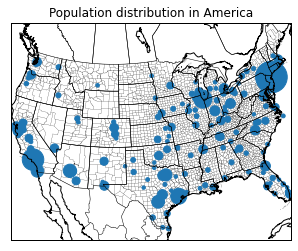

<Figure size 1080x1080 with 0 Axes>

In [2]:
# 原始資料有3228組資料，選擇了280個城市的資料
lat = np.array(posi["lat"][0:280]) # 獲取維度之維度值
lon = np.array(posi["lon"][0:280]) # 獲取經度值
pop = np.array(posi["pop"][0:280],dtype=float) # 獲取人口數，轉化為numpy浮點型

map = Basemap(projection='stere',lat_0=90,lon_0=-105,
            llcrnrlat=23.41 ,urcrnrlat=45.44,
            llcrnrlon=-118.67,urcrnrlon=-64.52,
            rsphere=6371200.,resolution='l',area_thresh=10000)

map.drawmapboundary()   # 繪製邊界
map.drawstates()        # 繪製州
map.drawcoastlines()    # 繪製海岸線
map.drawcountries()     # 繪製國家
map.drawcounties()      # 繪製縣

# 繪製散點圖時圖形的大小，如果之前pop不轉換為浮點型會沒有大小不一的效果
size=(pop/np.max(pop))*1000 

x,y = map(lon,lat)

map.scatter(x,y,s=size)

plt.title('Population distribution in America')
plt.figure(figsize=(15,15))
plt.show()

In [3]:
# 創建一提示，從鍵盤取得資訊
import sys

def get_input(prompt):
    if sys.hexversion > 0x03000000:
        return input(prompt)
    else:
        return raw_input(prompt)

In [10]:
get_input('hello')

helloy


'y'

In [4]:
# 為地球靜止(衛星視圖)投影創建底圖實例。
lon_0 = float(input('enter reference longitude (lon_0):'))

enter reference longitude (lon_0):15


Text(0.5, 1.0, 'Geostationary Map Centered on Lon=15.0')

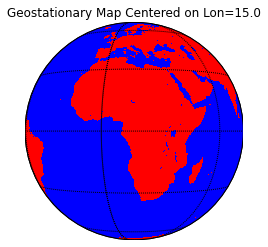

In [5]:
#繪製有陸地/海面遮罩的地圖。
fig=plt.figure()

# 把剛剛的 lon_0 代入並畫圖
m = Basemap(projection='geos',lon_0=lon_0,rsphere=(6378137.00,6356752.3142),resolution=None)

m.drawlsmask(land_color='red',ocean_color='blue',lakes=True)

# 繪製經緯度
m.drawparallels(np.arange(-90.,120.,30.))
m.drawmeridians(np.arange(0.,420.,60.))
m.drawmapboundary()
plt.title('Geostationary Map Centered on Lon=%s' % (lon_0))

In [6]:
!pip install netCDF4
from netCDF4 import Dataset as NetCDFFile # 若沒有報錯即安裝完成即可使用

In [7]:
# 導入資料庫與套件
import numpy as np
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [70]:
import os
# 利用 netCDF 中的 Dataset 獲取我們載下的檔案並去使用它，這裡是載 MERRA2_200.tavgM_2d_slv_Nx.199907.nc4 (可選)
data = Dataset(os.path.join("example DATASET", "MERRA2_200.tavgM_2d_slv_Nx.199907.nc4"), mode='r')
# 檔名不能中文ㄎㄅ
# 其實 data 就是一個字典
data.variables.keys()


dict_keys(['lon', 'lat', 'time', 'CLDPRS', 'CLDTMP', 'DISPH', 'H1000', 'H250', 'H500', 'H850', 'OMEGA500', 'PBLTOP', 'PS', 'Q250', 'Q500', 'Q850', 'QV10M', 'QV2M', 'SLP', 'T10M', 'T250', 'T2M', 'T2MDEW', 'T2MWET', 'T500', 'T850', 'TO3', 'TOX', 'TQI', 'TQL', 'TQV', 'TROPPB', 'TROPPT', 'TROPPV', 'TROPQ', 'TROPT', 'TS', 'U10M', 'U250', 'U2M', 'U500', 'U50M', 'U850', 'V10M', 'V250', 'V2M', 'V500', 'V50M', 'V850', 'ZLCL', 'Var_CLDPRS', 'Var_CLDTMP', 'Var_DISPH', 'Var_H1000', 'Var_H250', 'Var_H500', 'Var_H850', 'Var_OMEGA500', 'Var_PBLTOP', 'Var_PS', 'Var_Q250', 'Var_Q500', 'Var_Q850', 'Var_QV10M', 'Var_QV2M', 'Var_SLP', 'Var_T10M', 'Var_T250', 'Var_T2M', 'Var_T2MDEW', 'Var_T2MWET', 'Var_T500', 'Var_T850', 'Var_TO3', 'Var_TOX', 'Var_TQI', 'Var_TQL', 'Var_TQV', 'Var_TROPPB', 'Var_TROPPT', 'Var_TROPPV', 'Var_TROPQ', 'Var_TROPT', 'Var_TS', 'Var_U10M', 'Var_U250', 'Var_U2M', 'Var_U500', 'Var_U50M', 'Var_U850', 'Var_V10M', 'Var_V250', 'Var_V2M', 'Var_V500', 'Var_V50M', 'Var_V850', 'Var_ZLCL'])

In [78]:
# 設定經緯度，並讀入 T2M (兩公尺的溫度變數)
lon = data.variables['lon'][:]
lat = data.variables['lat'][:]
T2M = data.variables['T2M'][:, :, :]
print(lon)
print(lat)
print(T2M)

[-1.80000000e+02 -1.79375000e+02 -1.78750000e+02 -1.78125000e+02
 -1.77500000e+02 -1.76875000e+02 -1.76250000e+02 -1.75625000e+02
 -1.75000000e+02 -1.74375000e+02 -1.73750000e+02 -1.73125000e+02
 -1.72500000e+02 -1.71875000e+02 -1.71250000e+02 -1.70625000e+02
 -1.70000000e+02 -1.69375000e+02 -1.68750000e+02 -1.68125000e+02
 -1.67500000e+02 -1.66875000e+02 -1.66250000e+02 -1.65625000e+02
 -1.65000000e+02 -1.64375000e+02 -1.63750000e+02 -1.63125000e+02
 -1.62500000e+02 -1.61875000e+02 -1.61250000e+02 -1.60625000e+02
 -1.60000000e+02 -1.59375000e+02 -1.58750000e+02 -1.58125000e+02
 -1.57500000e+02 -1.56875000e+02 -1.56250000e+02 -1.55625000e+02
 -1.55000000e+02 -1.54375000e+02 -1.53750000e+02 -1.53125000e+02
 -1.52500000e+02 -1.51875000e+02 -1.51250000e+02 -1.50625000e+02
 -1.50000000e+02 -1.49375000e+02 -1.48750000e+02 -1.48125000e+02
 -1.47500000e+02 -1.46875000e+02 -1.46250000e+02 -1.45625000e+02
 -1.45000000e+02 -1.44375000e+02 -1.43750000e+02 -1.43125000e+02
 -1.42500000e+02 -1.41875

In [79]:
# 若在文件中使用多個時間索引的 MERRA-2 數據，以下將提取第一個時間索引。
T2M = T2M[0,:,:]
print(T2M)

[[212.2957  212.2957  212.2957  ... 212.2957  212.2957  212.2957 ]
 [210.59361 210.58603 210.57803 ... 210.6178  210.60963 210.60204]
 [210.81534 210.8219  210.82805 ... 210.79088 210.80016 210.80803]
 ...
 [273.55505 273.55466 273.55426 ... 273.55597 273.5557  273.55533]
 [273.44537 273.44476 273.44434 ... 273.44693 273.44635 273.4458 ]
 [273.40717 273.40717 273.40717 ... 273.40717 273.40717 273.40717]]


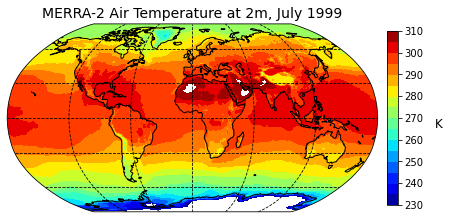

In [80]:
# 設置圖形大小，投影和範圍
fig = plt.figure(figsize=(8,4))
ax = plt.axes(projection=ccrs.Robinson())   # 在羅賓森投影上使用繪圖函數
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1)   # 解析度為粗糙
ax.gridlines(linestyle='--',color='black')

# 設置輪廓線級別，接著繪製圖和顏色欄
clevs = np.arange(230,311,5)
plt.contourf(lon, lat, T2M, clevs, transform=ccrs.PlateCarree(),cmap=plt.cm.jet)
plt.title('MERRA-2 Air Temperature at 2m, July 1999', size=14)
cb = plt.colorbar(ax=ax, orientation="vertical", pad=0.02, aspect=16, shrink=0.8)
cb.set_label('K',size=12,rotation=0,labelpad=15)
cb.ax.tick_params(labelsize=10)